In [1]:
import os
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from dotenv import load_dotenv

load_dotenv()

sys.path.append("..")
from data import PollenDataset
from data import MeshAnalyzer
from data import MeshCleaner
from data import MeshExplorer

## Meshexploration

In [2]:
analyzer = MeshAnalyzer()
df_results = analyzer.run_exploration()

Running exploratory analysis of 3D models...


Analyzing models: 100%|██████████| 208/208 [05:00<00:00,  1.44s/it]

Analyzed 208 models.
Watertight models: 119 of 208 (57.2%)

Exploratory analysis completed. Check the 'mesh_analysis' folder for saved CSV files.


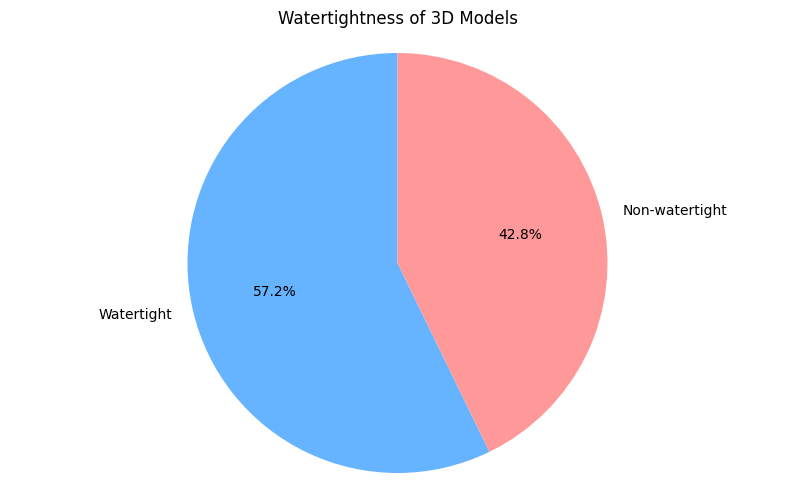

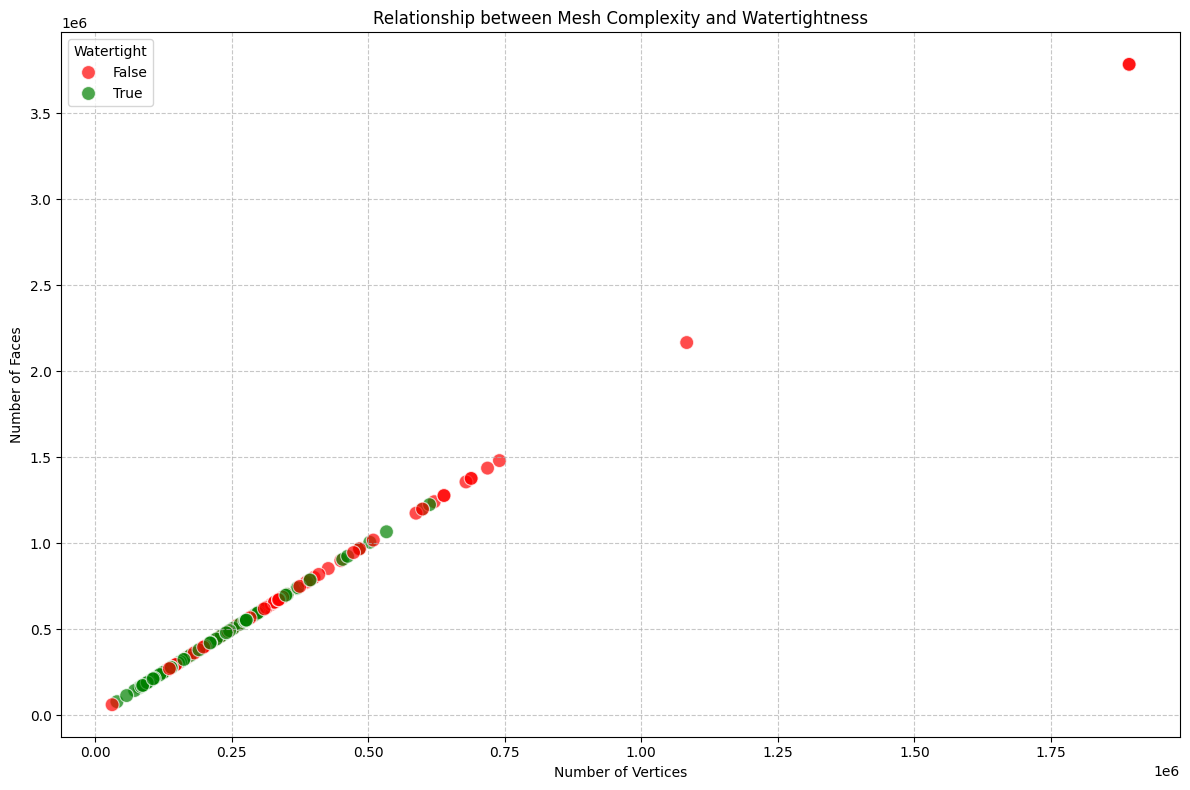

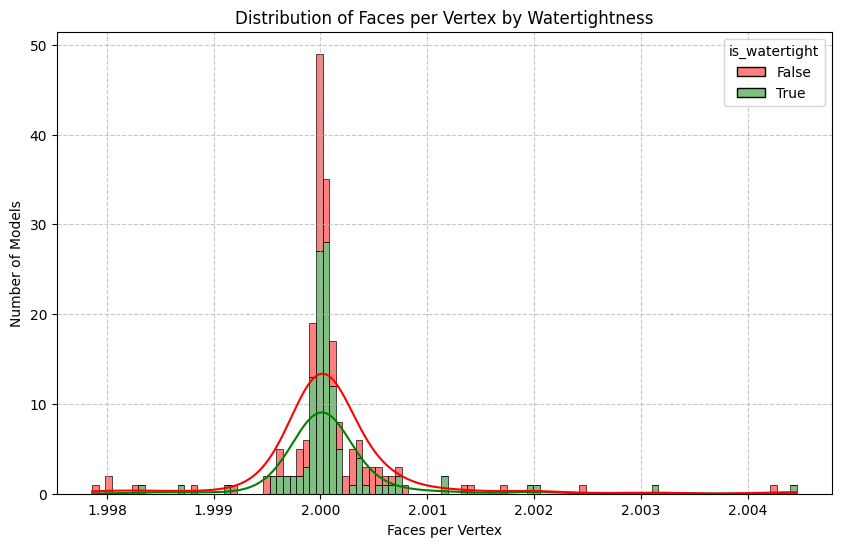

In [3]:
# Call visualization functions separately
analyzer.visualize_watertightness(df_results)

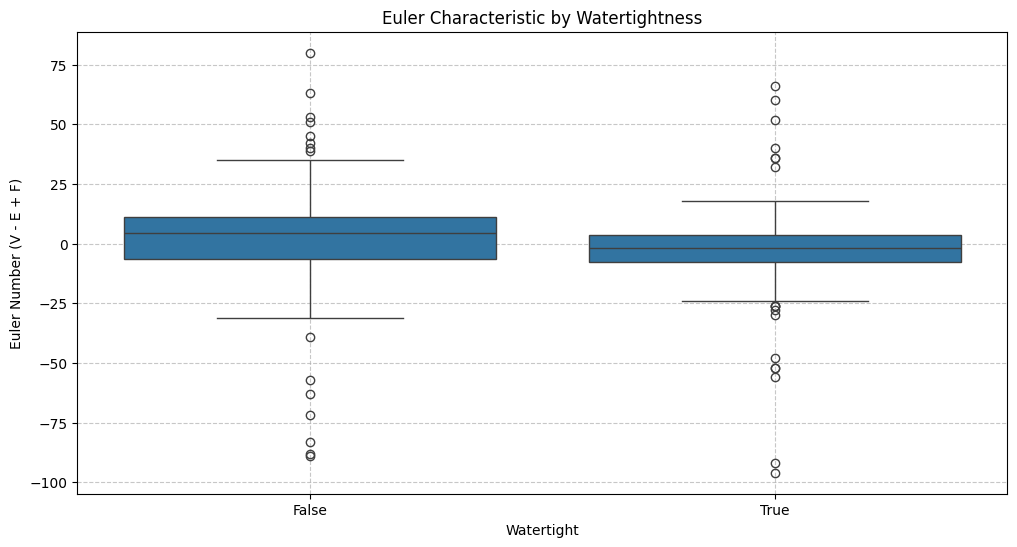

In [4]:
analyzer.analyze_euler_characteristics(df_results)

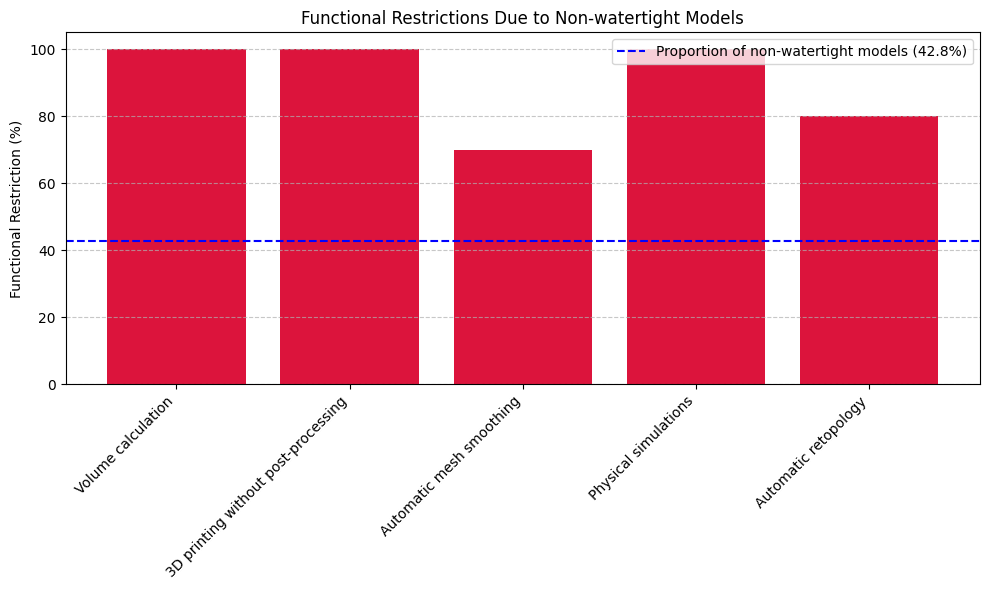

,Operation,Works with non-watertight models
0,Volume calculation,No - Volume not defined
1,3D printing without post-processing,No - Printing problems likely
2,Automatic mesh smoothing,Partially - Results unreliable
3,Physical simulations,No - Physics requires closed volumes
4,Automatic retopology,Partially - Poor results likely
5,Watertightness required for successful operation,Yes


In [5]:
analyzer.compute_implications_of_non_watertight(df_results)

c:\Users\super\Documents\GitHub\sequoia\.venv\Lib\site-packages\pyglet\libs\win32\__init__.py:318: UserWarning: Could not set COM MTA mode. Unexpected behavior may occur.
  warnings.warn("Could not set COM MTA mode. Unexpected behavior may occur.")


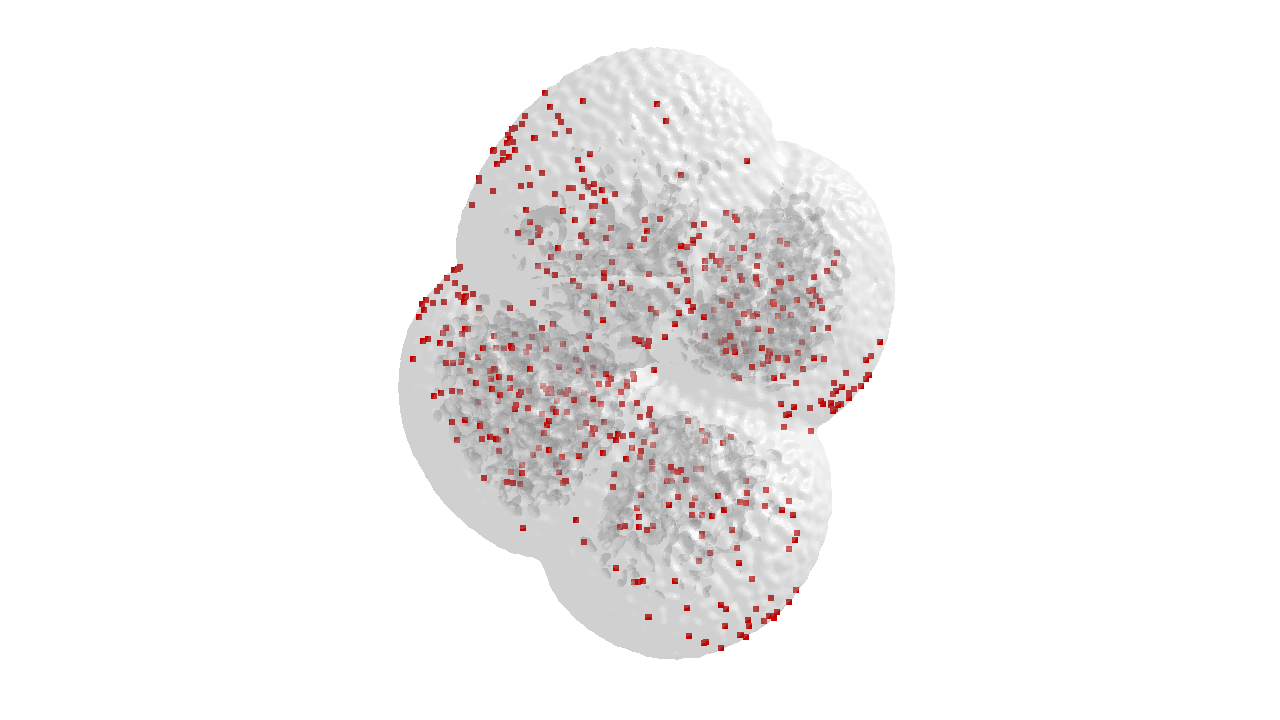

Visualization created for 20099_typha_latifolia-rhombohedral_tetrad_NIH3D.stl


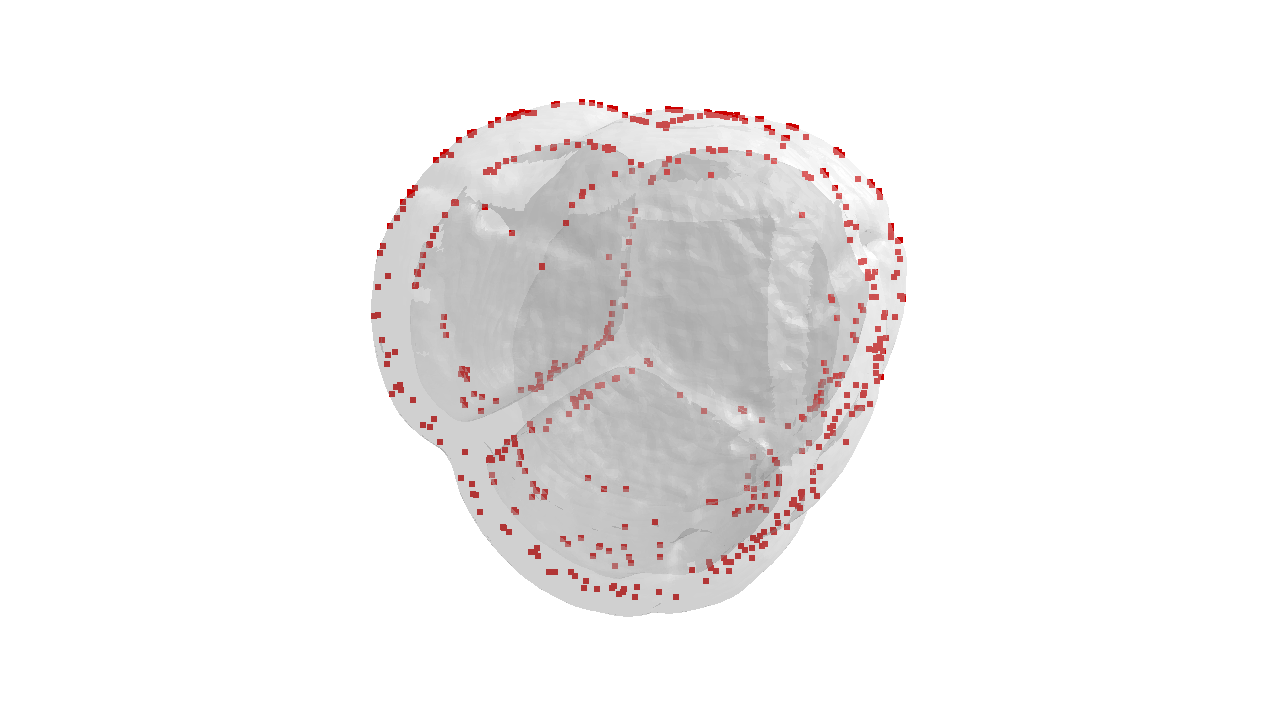

Visualization created for 17795_Calluna_vulgaris%20-%20Heather_NIH3D.stl


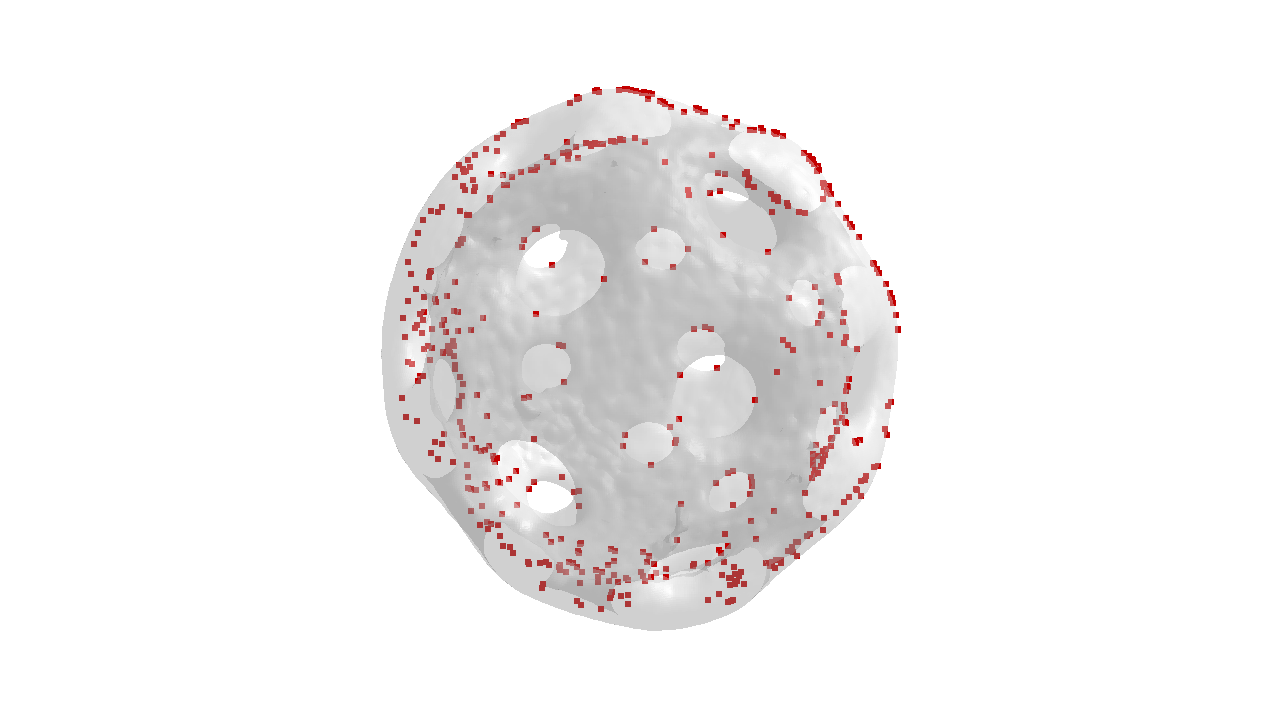

Visualization created for 20608_arenaria_serpyllifolia_NIH3D.stl


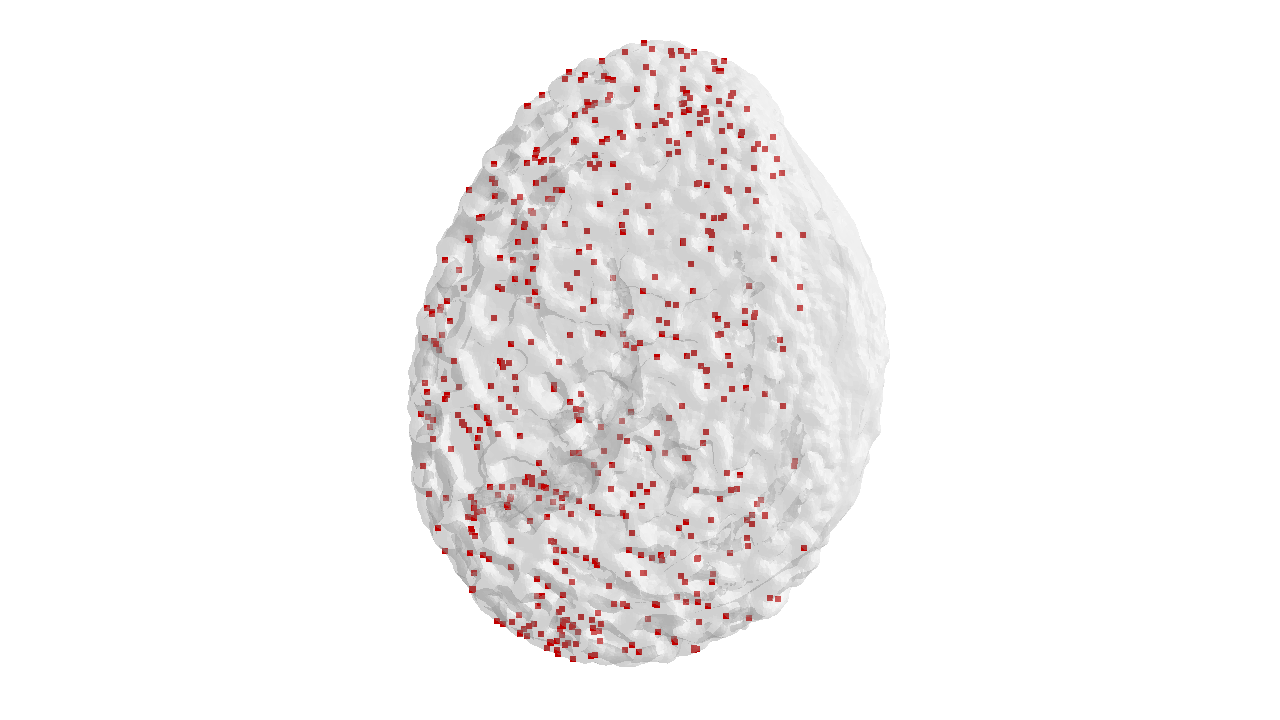

Visualization created for 17782_Lilium%20auratum%20-%20Golden-rayed%20lily_NIH3D.stl


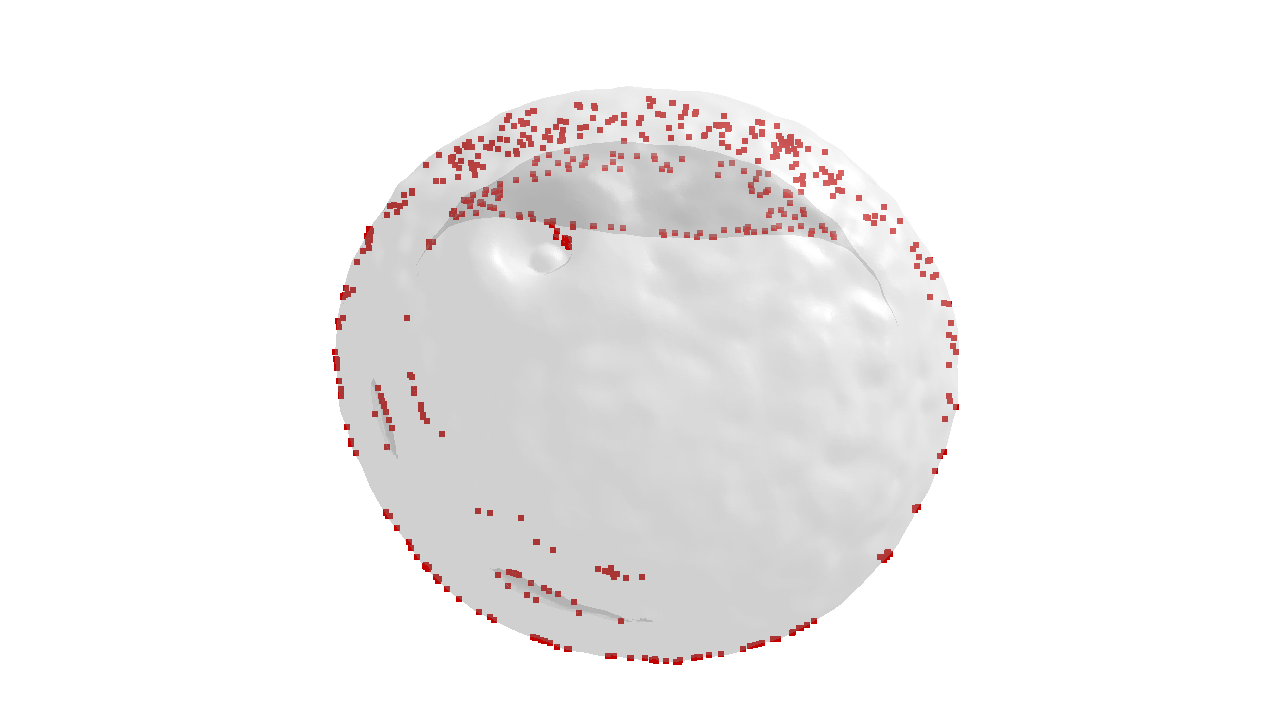

Visualization created for 21464_anthoxanthum_odoratum_NIH3D.stl


In [6]:
analyzer.visualize_sample_models(df_results)

In [ ]:
explorer = MeshExplorer()
adv_results = explorer.run_advanced_analysis()
display(adv_results)

Running advanced 3D model analysis...


Analyzing 3D models:  49%|████▉     | 102/208 [02:35<01:50,  1.04s/it]

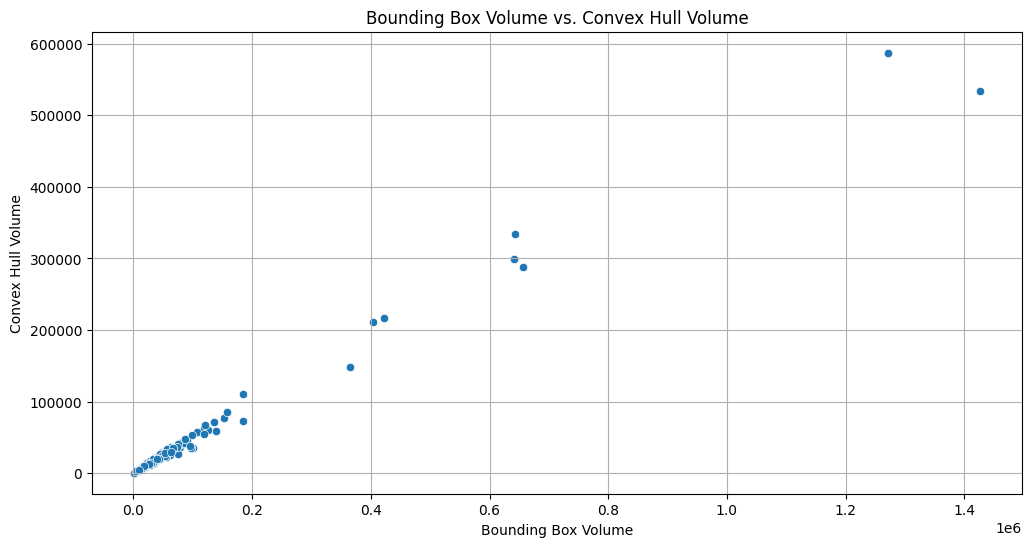

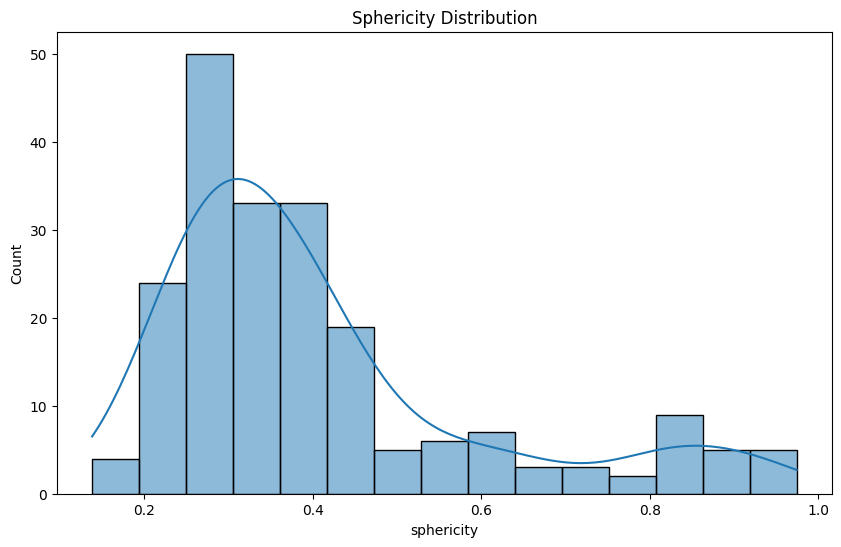

<module 'matplotlib.pyplot' from 'c:\\Users\\super\\Documents\\GitHub\\sequoia\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [ ]:
explorer.visualize_advanced_properties(adv_results)

  File "c:\Users\super\Documents\GitHub\sequoia\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


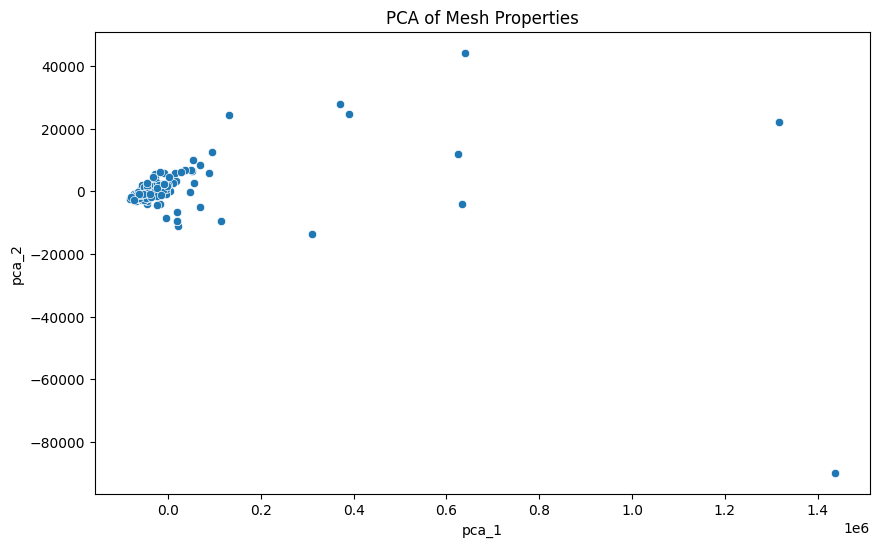

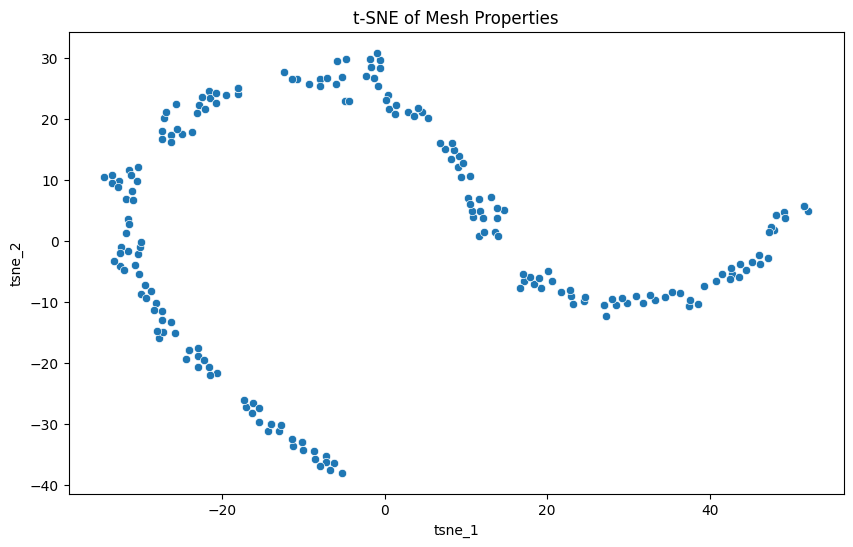

In [ ]:
explorer.perform_dimensionality_reduction(adv_results)

# 3D Model Cleaning Pipeline  

## Overview of the MeshCleaner Class  

The `MeshCleaner` class provides a comprehensive pipeline for processing, analyzing, and cleaning 3D STL models. It is specifically designed for preparing 3D models for machine learning, visualization, or 3D printing.  

## Key Features  

- **Model Analysis**: Computes geometric properties and quality metrics  
- **Model Cleaning**: Removes defects and fills holes  
- **Model Normalization**: Scaling, centering, and orientation adjustments  
- **Visualization**: Generates statistics and charts for model analysis  

## Three-Stage Hole Filling  

The pipeline implements an advanced three-stage strategy for filling holes:  

### 1. Small Holes (`trimesh.fill_holes`)  
- **Method**: Native Trimesh functionality  
- **Best for**: Small, simple holes  
- **Advantages**: Fast and efficient for minor defects  

### 2. Medium-Sized Holes (`vtkFillHolesFilter`)  
- **Method**: VTK library functions  
- **Best for**: Medium-sized holes with moderate complexity  
- **Advantages**: More robust for larger holes where Trimesh fails  

### 3. Complex Holes (`manifold3d`)  
- **Method**: Manifold repair algorithm  
- **Best for**: Complex topology, multiple or large gaps  
- **Advantages**: Can repair severely damaged meshes  

## Workflow  

1. The model is loaded, and basic statistics are collected  
2. Unreferenced vertices are removed  
3. The three-stage hole filling process is applied (if enabled)  
4. Duplicate faces are removed (if enabled)  
5. The model is scaled (if enabled)  
6. The model is centered (if enabled)  
7. The cleaned model is saved  
8. Statistical reports and visualizations are generated  

## Dependencies  

The pipeline utilizes several specialized libraries:  



Die Software prüft nach jeder Bearbeitung, ob die Modelle wasserdicht sind, und erstellt eine Liste von Modellen, die weiterhin Probleme aufweisen. Diese können dann gezielt nachbearbeitet werden.

In [ ]:
cleaner = MeshCleaner()
cleaner.process_all()

Processing Meshes:   0%|          | 0/208 [00:00<?, ?it/s]